In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r"C:\Users\Yash Pardeshi\Downloads\codsoft\Iris_Dataset\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

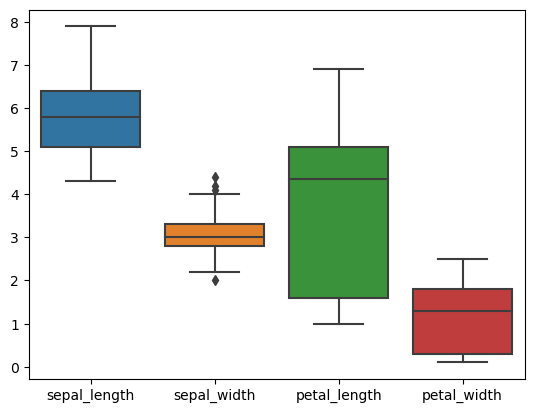

In [7]:
sns.boxplot(data=df) #to check outliers

In [8]:
# Treatment of outlier using = winsorizing technique
for i in df:
    if df [i].dtypes in ("int64", "float64"): 
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

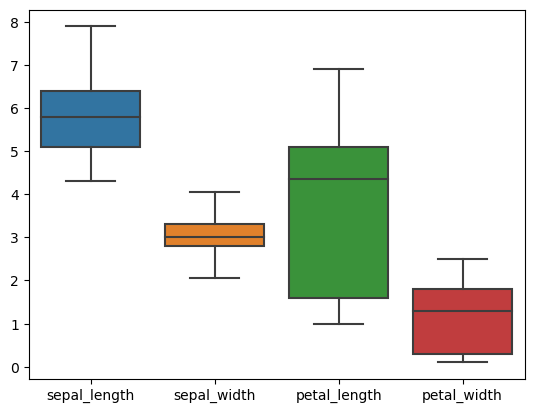

In [9]:
sns.boxplot(data=df)

In [10]:
print("Target Lables", df["species"].unique())    #data visualisation

Target Lables ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [12]:
import plotly.express as px
fig = px.scatter(df, x = "sepal_width", y = "sepal_length", color="species")
fig.show()

In [13]:
df['species'].dtype  #changing datatype

dtype('O')

In [14]:
# changing the data type of species from object to category
df['species'] = df['species'].astype('category')
df['species'].dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

# Model Building using KNN

In [15]:
X = df.drop('species', axis=1)

y = df[['species']]

#splitting the data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)



from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### - now lets input a set of measurements of the iris flower and use the model to predict the iris species

In [16]:
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [17]:
x_new = np.array([[4.9, 3.0, 1.4, 0.3]])
prediction = knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-setosa']
